In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv(r"C:\Users\mohit\Pictures\ml\Project1\Bengaluru_House_Data.csv")
print(df1.shape)
df1.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\mohit\AppData\Local\Temp\ipykernel_10936\3847263516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [9]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [10]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [11]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [14]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [15]:
df3[~df3['total_sqft'].apply(is_float)].sample(60)

,location,size,total_sqft,bath,price,bhk
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
7334,Kanakpura Road,1 Bedroom,2Acres,1.0,125.000,1
12334,Budigere,1 BHK,650 - 760,1.0,34.545,1
10488,2 Bedroom Furnished Farm House in Kolar Road,2 Bedroom,1.25Acres,2.0,200.000,2
1019,Marathi Layout,1 Bedroom,5.31Acres,1.0,110.000,1
10541,Kanakpura Road,1 BHK,381 - 535,1.0,33.660,1
7520,Doddaballapur,3 BHK,1100Sq. Meter,2.0,48.000,3
7001,Thyagaraja Nagar,8 Bedroom,1500Cents,6.0,290.000,8
10620,Old Madras Road,4 BHK,3630 - 3800,6.0,212.500,4


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_to_num('2166')

2166.0

In [18]:
convert_sqft_to_num('980 - 1030')

1005.0

In [19]:
convert_sqft_to_num('78.03Sq. Meter')

In [20]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df4.loc[2920]

location      Mysore Road
size                2 BHK
total_sqft         1005.0
bath                  2.0
price              35.175
bhk                     2
Name: 2920, dtype: object

In [22]:
(980+1030)/2

1005.0

In [23]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df5.location.unique())

1304

In [25]:
df5.location = df5.location.apply(lambda x : x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
location_stats_lessthan_10 = location_stats[location_stats<=10]
location_stats_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [27]:
len(df5.location.unique())

1293

In [28]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_lessthan_10 else x)
len(df5.location.unique())

242

## Outlier Removal

In [29]:
df5.shape

(13246, 7)

In [30]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [31]:
for key,subdf in df6.groupby('location'):
    print(key,'\n',subdf)
    break

1st Block Jayanagar 
                   location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805668  
7383

In [36]:
m-st

8629.088338000967

In [37]:
m+st

16089.419177132548

In [34]:
subdf

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
2355,1st Block Jayanagar,4 Bedroom,2400.0,4.0,450.0,4,18750.000000
4991,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
7383,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
8507,1st Block Jayanagar,3 BHK,1760.0,3.0,115.0,3,6534.090909
10972,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163


In [35]:
m = np.mean(subdf.price_per_sqft)
st = np.std(subdf.price_per_sqft)

In [38]:
subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
7383,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
10972,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163


In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        df_reduced = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,df_reduced],ignore_index=True)
        
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [40]:
df7.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

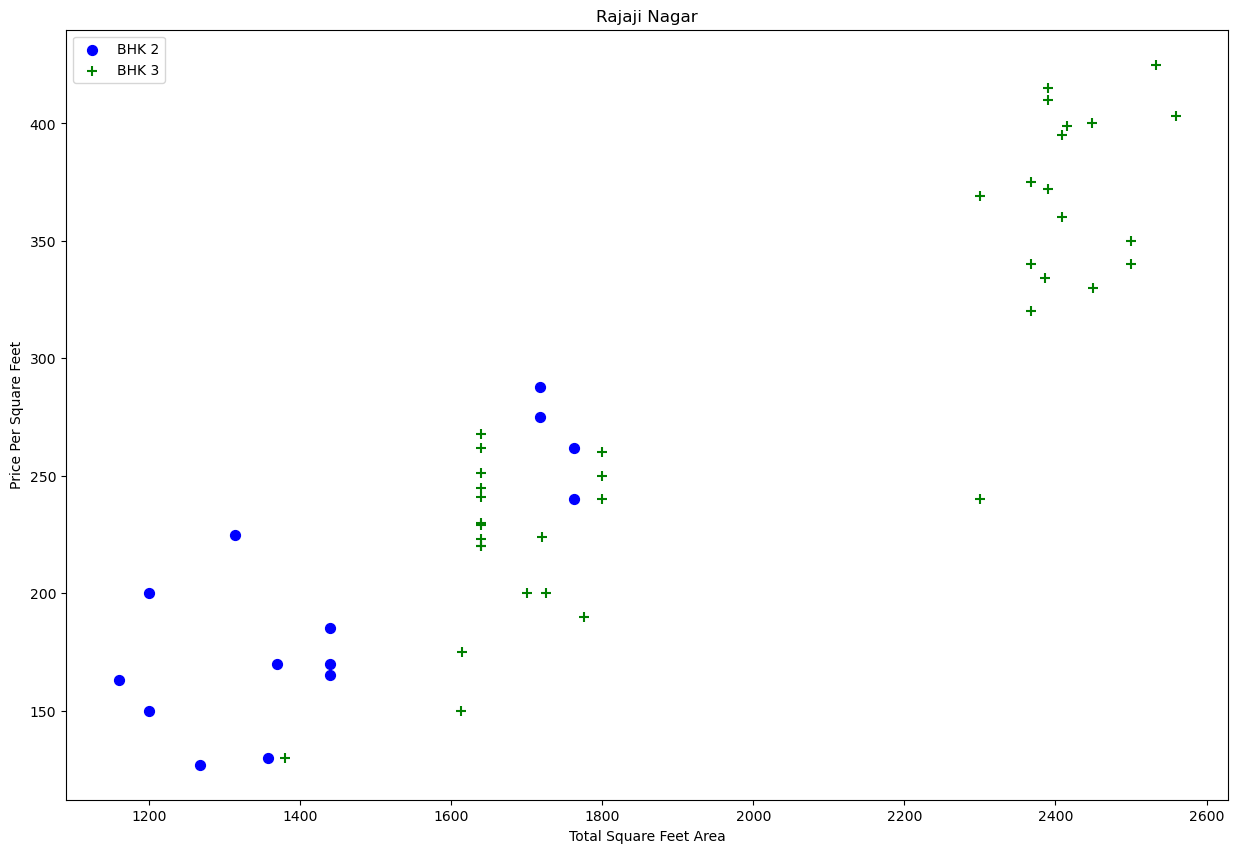

In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue', label = 'BHK 2', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+',color = 'green',label = 'BHK 3', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

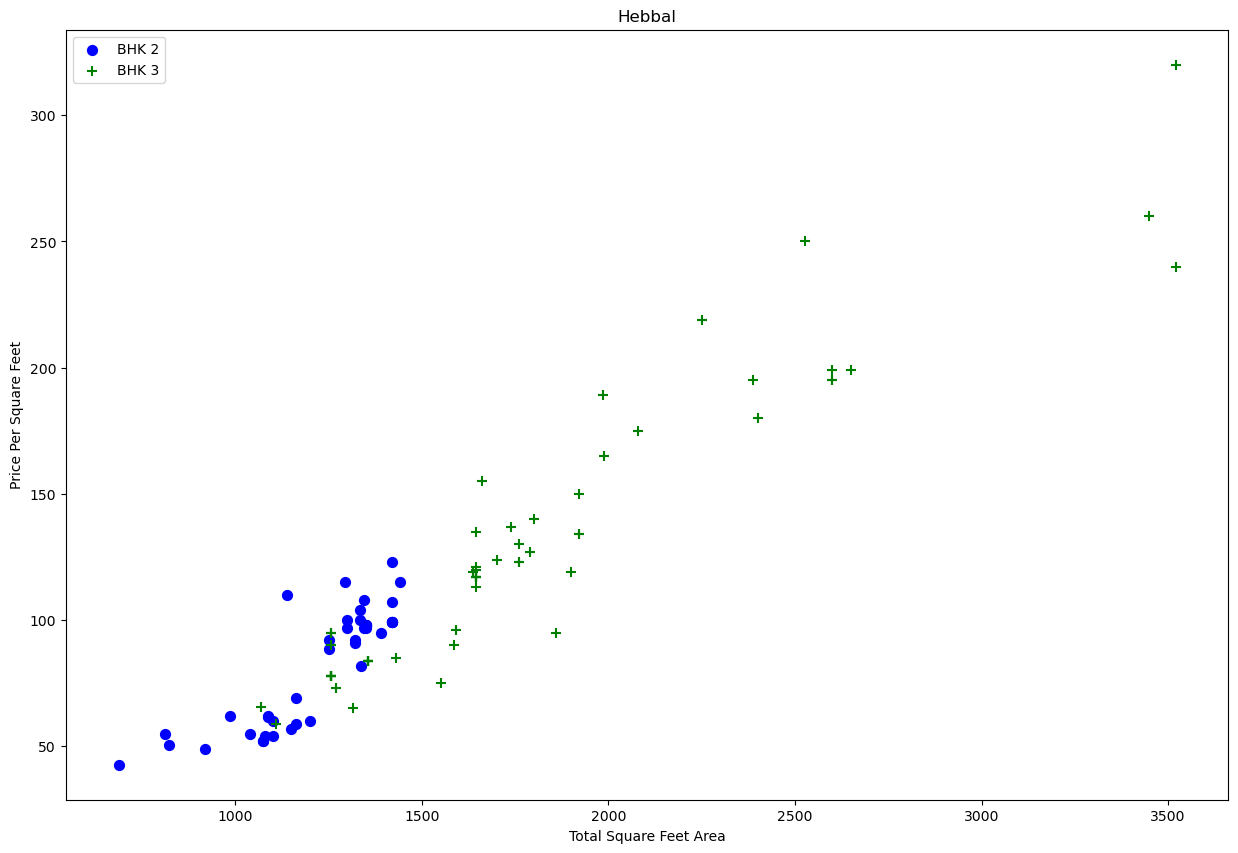

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue', label = 'BHK 2', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+',color = 'green',label = 'BHK 3', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")

## we should also remove properties for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment(with same square feet area).What we will do is for a given location ,we will build a dictionary od stats per bhk i.e,

## {
##  '1' : {
##         'mean' : 4000,
##         'std' : 2000,
##         'count' : 34
## },
##  '2' : {
##         'mean' : 4300,
##         'std' : 2300,
##         'count' : 22
## },
## }



## Now we can remove those 2 BHK Apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK Apartment

In [43]:
exclude_indices = np.array([])
exclude_indices

array([], dtype=float64)

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std'  : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis = 'index')

In [59]:
for location, location_df in df7.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
        bhk_stats[bhk] = {
        'mean' : np.mean(bhk_df.price_per_sqft),
        'std'  : np.std(bhk_df.price_per_sqft),
        'count': bhk_df.shape[0]
    }
    break

In [60]:
bhk, bhk_df

(4,
               location   size  total_sqft  bath  price  bhk  price_per_sqft
 0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
 5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
 6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163)

In [61]:
bhk_stats

{2: {'mean': 11983.805668016194, 'std': 0.0, 'count': 1},
 3: {'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3},
 4: {'mean': 15018.711280365416, 'std': 1.2278182423353805, 'count': 3}}

In [62]:
(10833.333333+12533.333333+11901.840491)/3

11756.169052333333

In [63]:
bhk_stats.get(bhk-1)

{'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}

In [64]:
bhk

4

In [65]:
bhk_stats.get(2)

{'mean': 11983.805668016194, 'std': 0.0, 'count': 1}

In [67]:
remove_bhk_outliers(df7)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [68]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

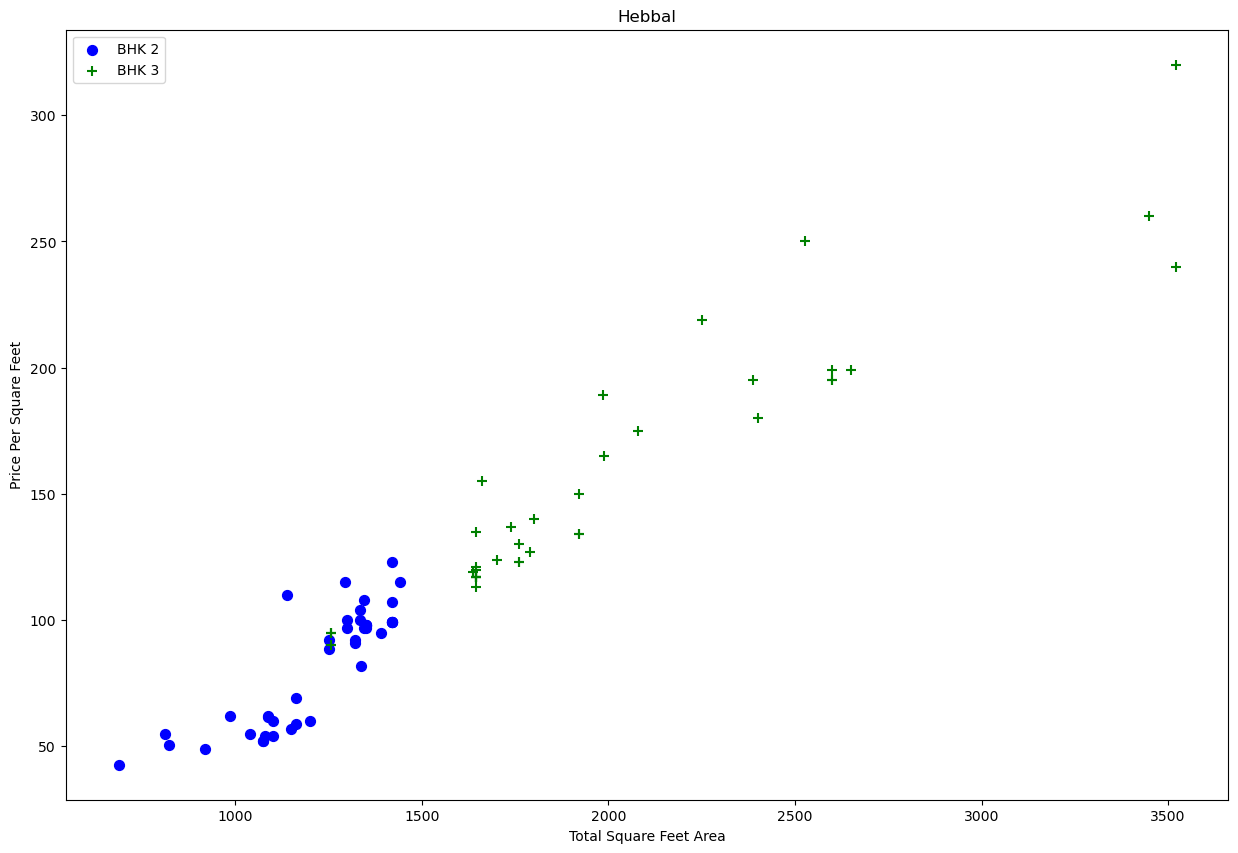

In [69]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

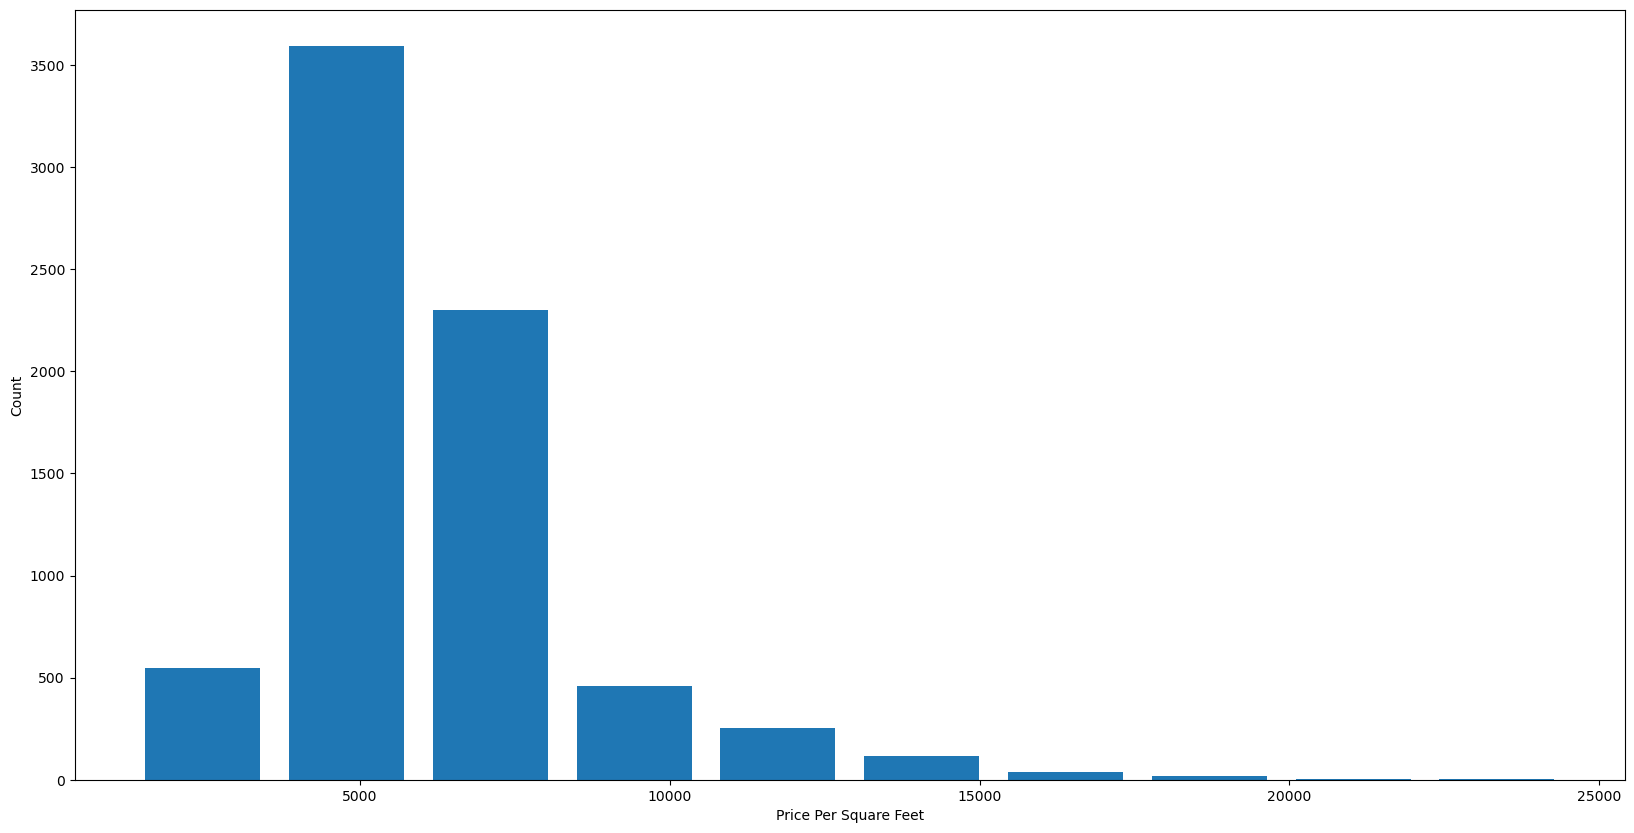

In [70]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [71]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [72]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

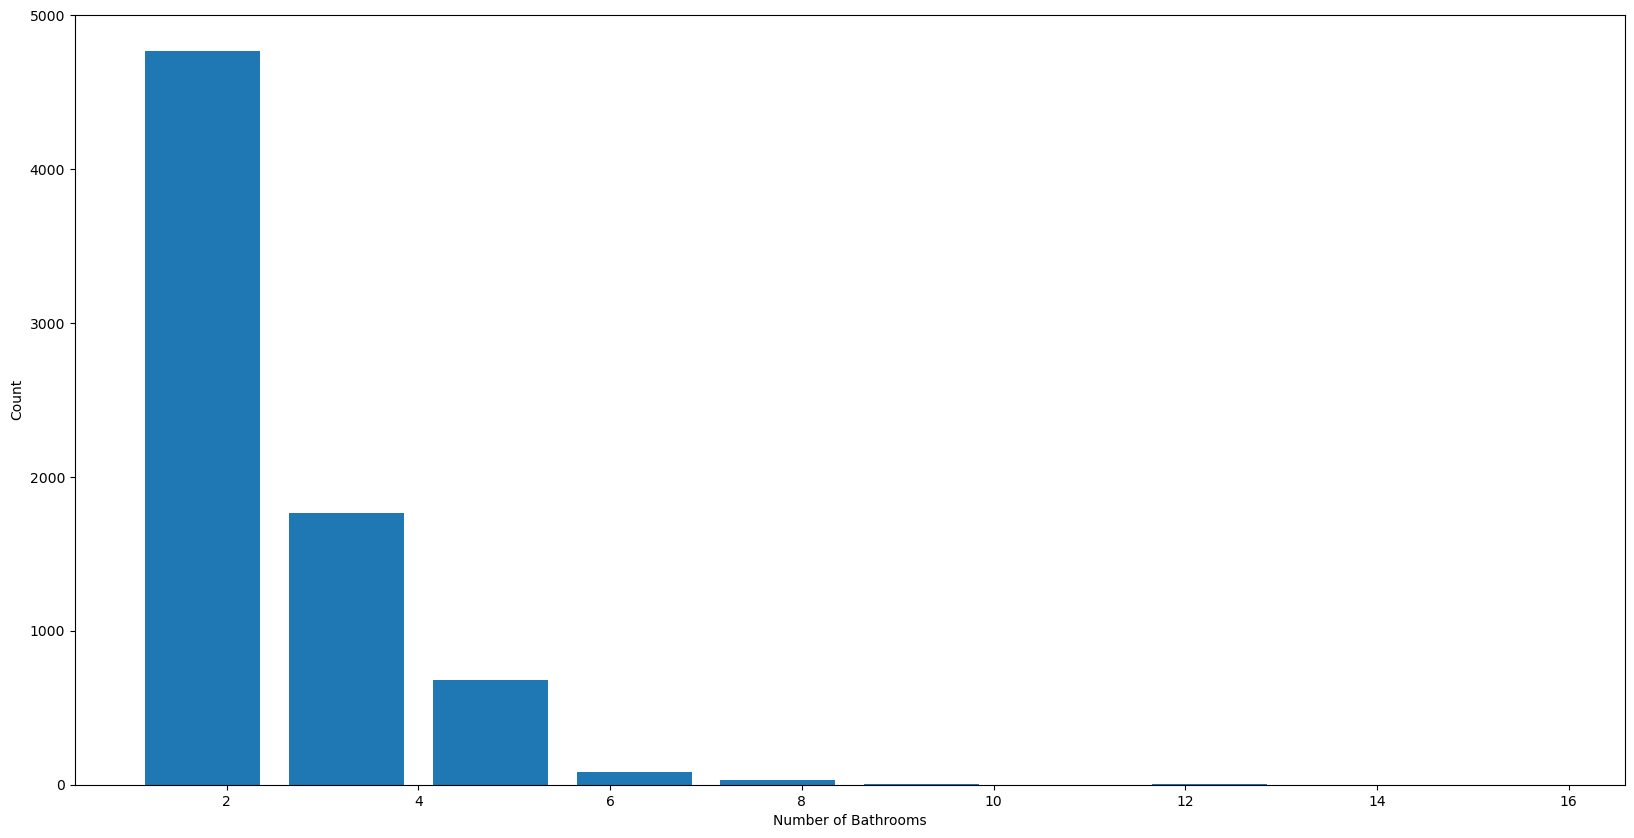

In [73]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [74]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [75]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [76]:
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [77]:
dummies = pd.get_dummies(df10.location)

df11 = pd.concat([df10,dummies.drop(['other'],axis = 1)],axis = 'columns')

df12 = df11.drop(['location'],axis = 1)
print(df12.shape)

X = df12.drop(['price'],axis = 'columns')
y = df12.price

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

(7251, 245)


0.8452277697874272

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [79]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True,False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.718079,"{'criterion': 'mse', 'splitter': 'best'}"


## as we see linear_regression model has best score so we are using LR, as i have already trained LR as lr_clf

In [88]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]
    

In [87]:
np.where(X.columns=='1st Block Jayanagar')[0][0]

3

In [89]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677164419

In [90]:
predict_price('1st Phase JP Nagar',1000,3,3)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395190962

In [91]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484007112

In [92]:
import pickle

with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [93]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json',"w") as f:
    f.write(json.dumps(columns))

In [94]:
import util

In [96]:
util.load_saved_artifacts()

load saved artifacts......start
load saved artifacts......done


In [97]:
util.get_location_names()

['1st block jayanagar',
 '1st phase jp nagar',
 '2nd phase judicial layout',
 '2nd stage nagarbhavi',
 '5th block hbr layout',
 '5th phase jp nagar',
 '6th phase jp nagar',
 '7th phase jp nagar',
 '8th phase jp nagar',
 '9th phase jp nagar',
 'aecs layout',
 'abbigere',
 'akshaya nagar',
 'ambalipura',
 'ambedkar nagar',
 'amruthahalli',
 'anandapura',
 'ananth nagar',
 'anekal',
 'anjanapura',
 'ardendale',
 'arekere',
 'attibele',
 'beml layout',
 'btm 2nd stage',
 'btm layout',
 'babusapalaya',
 'badavala nagar',
 'balagere',
 'banashankari',
 'banashankari stage ii',
 'banashankari stage iii',
 'banashankari stage v',
 'banashankari stage vi',
 'banaswadi',
 'banjara layout',
 'bannerghatta',
 'bannerghatta road',
 'basavangudi',
 'basaveshwara nagar',
 'battarahalli',
 'begur',
 'begur road',
 'bellandur',
 'benson town',
 'bharathi nagar',
 'bhoganhalli',
 'billekahalli',
 'binny pete',
 'bisuvanahalli',
 'bommanahalli',
 'bommasandra',
 'bommasandra industrial area',
 'bommenaha